# INTENTO ARMADO ARBOL DE CLASIFICACIÓN

En este nootbook se detalla el intento de armar un arbol de clasificación de las categorías de los items del data set.

Con el fin de comprender la naturaleza de los datos y sus posibles características, se intentó crear a partir de las categorías de los mismos un arbol de categorías, de los que se suelen encontrar en muchas páginas de ventas de productos, como páginas de venta de ropa, electrodomésticos, etc.

A modo de ejemplo, se muestra el siguente gráfico que ilustra un arbol de categorías como el mencionado:

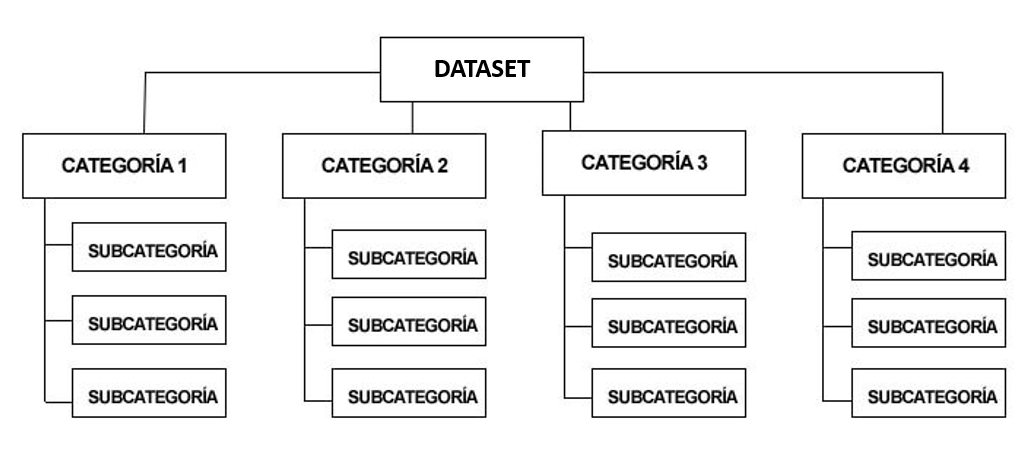

En base a esto, se podría pensar a estas categorías y subcategorías como clusters y sub-clusters, dentro de los cuales se tendría un conjunto de items.

En el siguente gráfico se ilustra lo explicado:

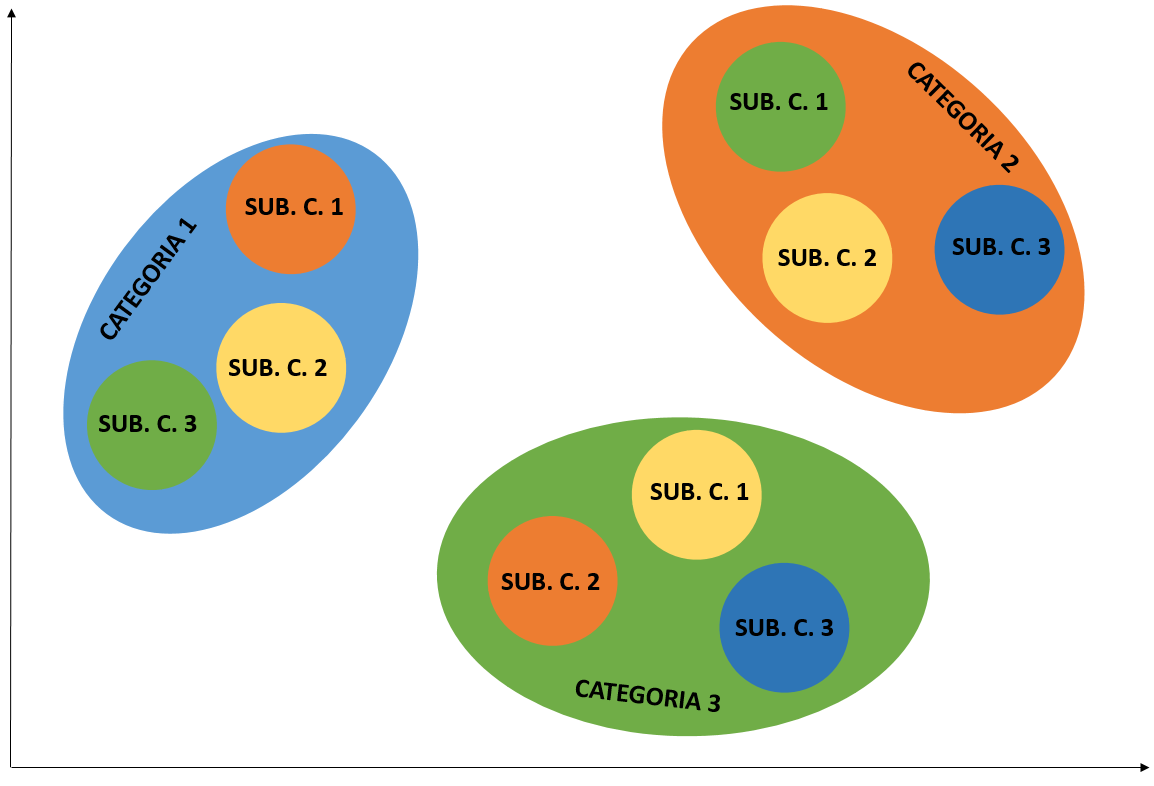

Para lograr lo explicado se siguió el siguiente procedimiento:

### Importación de paquetes y datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
purchases = pd.read_csv('C:/Users/Usuario/Desktop/CURSO UNIVERSIDAD DE BARCELONA 2020 - 2021/TRABAJO FINAL/dressipi_recsys2022/train_purchases.csv')
sessions = pd.read_csv('C:/Users/Usuario/Desktop/CURSO UNIVERSIDAD DE BARCELONA 2020 - 2021/TRABAJO FINAL/dressipi_recsys2022/train_sessions.csv')
features = pd.read_csv('C:/Users/Usuario/Desktop/CURSO UNIVERSIDAD DE BARCELONA 2020 - 2021/TRABAJO FINAL/dressipi_recsys2022/item_features.csv')

### Cantidad de Categorías en cada Item y Cantidad de Items en cada Categoría

In [3]:
features.sort_values(by="feature_category_id")

,item_id,feature_category_id,feature_value_id
11776,713,1,461
356769,21238,1,461
213170,12692,1,461
36172,2191,1,461
114130,6823,1,461
...,...,...,...
450632,26870,73,544
55504,3343,73,544
340117,20251,73,544
450645,26871,73,544


In [5]:
#CANTIDAD DE CATEGORÍAS EN CADA ITEM
items_total=features.groupby(['item_id']).count()
items_total

,feature_category_id,feature_value_id
item_id,,
2,13,13
3,24,24
4,24,24
7,15,15
8,24,24
...,...,...
28139,24,24
28140,18,18
28141,24,24


In [7]:
#CANTIDAD DE ITEMS EN CADA CATEGORÍA
freq = features.groupby(['feature_category_id']).count() 
freq

,item_id,feature_value_id
feature_category_id,,
1,941,941
2,2253,2253
3,9311,9311
4,14954,14954
5,9488,9488
...,...,...
69,20450,20450
70,807,807
71,671,671


In [8]:
freq.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
freq

,feature_category_id,item_id,feature_value_id
0,1,941,941
1,2,2253,2253
2,3,9311,9311
3,4,14954,14954
4,5,9488,9488
...,...,...,...
68,69,20450,20450
69,70,807,807
70,71,671,671
71,72,20499,20499


In [10]:
#CATEGORÍAS ORDENADAS DE MAYOR A MENOR CANTIDAD DE ITEMS
freq.sort_values(by="item_id",ascending=False, inplace=True)
freq

,feature_category_id,item_id,feature_value_id
55,56,23691,23691
46,47,23691,23691
49,50,23077,23077
67,68,23038,23038
60,61,22512,22512
...,...,...,...
51,52,568,568
53,54,341,341
12,13,137,137
8,9,137,137


<AxesSubplot:>

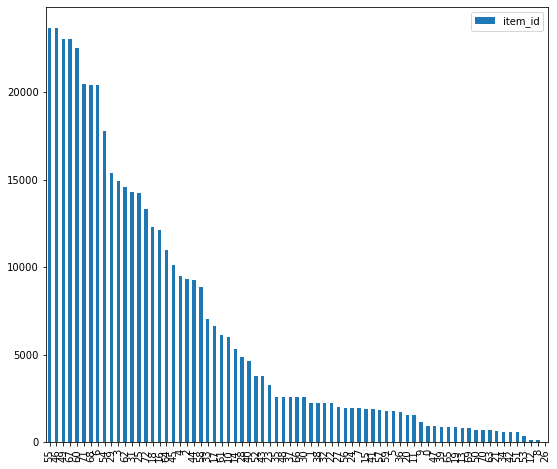

In [11]:
freq.plot(y="item_id", kind="bar",figsize=(9,8))


En el gráifico anterior se puede observar que la cantidad de items que posee cada categoría varía en forma bastante gradual desde dos categorías que posee todos los items (Categorías 47 y 56), hasta una categoría que solo posee 1 items (Categoría 27)

A continuación se procede a la subdivisión del conjunto de categorías en distintos niveles, para formar el arbol de categorías y subcategorías esquematizado anteriormente.

### Armado del Arbol de Categorías

In [15]:
#Elementos axuliares para el código
auxiliar= features.copy()

En primer lugar se genera una lista con los items y sus respectivas categorías:

In [13]:
items_features=[]

for k in range(len(auxiliar.index)):

    if (k-1) >=0:
        if auxiliar.iloc[k,0] == auxiliar.iloc[(k-1),0]:
            items_features[-1][1].append(auxiliar.iloc[k,1])
        else:
            items_features.append([auxiliar.iloc[k,0],[auxiliar.iloc[k,1]]]) 
    else:
        items_features.append([auxiliar.iloc[k,0],[auxiliar.iloc[k,1]]])

print(items_features)

[[2, [56, 62, 68, 33, 72, 29, 16, 50, 61, 53, 7, 69, 47]], [3, [56, 69, 68, 17, 32, 11, 45, 7, 19, 46, 61, 73, 55, 63, 50, 59, 4, 72, 5, 26, 3, 65, 18, 47]], [4, [55, 17, 5, 69, 18, 68, 50, 73, 65, 7, 59, 47, 46, 56, 4, 26, 3, 19, 32, 63, 22, 61, 45, 72]], [7, [56, 50, 63, 41, 26, 32, 61, 68, 69, 7, 15, 44, 72, 19, 47]], [8, [56, 55, 7, 69, 72, 3, 45, 18, 59, 73, 5, 61, 68, 4, 65, 26, 50, 32, 46, 17, 19, 11, 63, 47]], [9, [56, 61, 72, 34, 69, 11, 4, 3, 63, 7, 32, 26, 68, 50, 17, 18, 19, 46, 55, 65, 45, 59, 73, 5, 47]], [10, [56, 15, 63, 12, 30, 61, 50, 69, 7, 30, 72, 62, 68, 21, 47]], [11, [56, 47, 69, 59, 68, 11, 72, 50, 61, 26, 32, 19, 18, 30, 30, 7, 30]], [13, [56, 29, 4, 63, 55, 24, 73, 62, 68, 33, 28, 72, 47, 7, 69, 50, 61, 53]], [14, [61, 14, 8, 70, 32, 50, 34, 16, 7, 26, 69, 5, 55, 57, 56, 25, 47, 72, 68]], [16, [56, 73, 61, 72, 63, 45, 50, 18, 46, 5, 7, 32, 22, 59, 17, 26, 69, 68, 55, 3, 19, 4, 65, 47]], [17, [51, 61, 30, 47, 56, 50, 49, 38, 31, 37, 42, 36, 67, 68, 39, 55, 23, 

In [17]:
# Dado que las categorías 56 y 47 estan presentes en todos los items (23691), las mismas se quitan para el análisis.


freq_copy=freq.copy()
freq_copy.drop(index=[55,46], inplace = True)  #saco las category 56 y 47



freq_copy

,feature_category_id,item_id,feature_value_id
49,50,23077,23077
67,68,23038,23038
60,61,22512,22512
71,72,20499,20499
68,69,20450,20450
...,...,...,...
51,52,568,568
53,54,341,341
12,13,137,137
8,9,137,137


Podemos ver que la siguiente categoría con más items es la 50, con 23077 items.

Es importante empezar por las cateogrías que estan presentes en una mayor cantidad de items ya que por este motivo es lógico que se posicionen en un nivel superior en el arbol de categorías


In [19]:
#Elementos axuliares para el código

b=len(freq_copy)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)



A continuación se genera una lista en la cual primero se tiene la categoría con mayor cantidad de items y dichos items. A su vez, se muestran las demás categorías y los items restantes, aunque deben ser analizados nuevamente para generar de forma correcta el arbol de categorías.


In [20]:
for i in range(b):
    features_ranking.append([freq_copy.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_copy.iloc[i,0] in auxiliar_items_1[j][1]:
            features_ranking[i][1].append(auxiliar_items_1[j][0])
            auxiliar_items_2.pop(j-f)
            f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)
        
      

In [22]:
print(features_ranking)

[[50, [2, 3, 4, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 74, 78, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 137, 138, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 214, 215, 217, 218, 219, 221, 222, 223, 224, 225, 227, 228, 230, 231, 233, 234, 236, 238, 239, 241, 242, 243, 244, 245, 246, 247, 248, 251, 252, 253, 257, 258, 259, 260, 263, 264, 265, 266, 267, 269, 271

Como resultado se tiene en primer lugar la categoría 50, y que los items restantes estan presentes en las categorias 68, 61, 72, 69, 36 y 49. Sin embargo, como ya se mencionó, se deben volver a analizar estos items restantes y las categorías en las cuales estan presentes.

Una vez identificada la categoría con mayor cantidad de items y sus items (en este caso la categoría 50), se debe volver a ordenar las demás categorías en función de los items restantes.

In [23]:
#Items restante:
    
print(features_ranking[3][1][:])

[76, 220, 240, 1109, 1969, 2280, 2451, 2498, 2513, 3335, 4736, 4770, 4997, 5025, 6402, 7198, 7728, 7932, 8576, 9014, 9975, 10459, 10688, 10905, 10961, 11195, 11436, 11512, 12121, 12338, 12646, 13537, 14180, 14320, 15358, 15496, 15711, 16191, 16557, 16790, 17021, 17054, 17451, 17728, 17818, 19435, 21684, 22348, 22469, 23970, 24955, 26550, 27011, 27612]


In [24]:
#Total de items restantes

print(len(features_ranking[3][1]))

54


In [25]:
#Anlizo orden de las categorías 68, 61, 72, 69, 36 y 49.

# Primero armo una lista con todos los productos de esas categorías

a=len(features_ranking)-1

items_sec=[]

for i in range(a):
    b=len(features_ranking[i+1][1])
    for j in range(b):
        items_sec.append(features_ranking[i+1][1][j])

items_sec.sort()
print(items_sec)

[76, 220, 240, 262, 1109, 1969, 2280, 2451, 2498, 2513, 2954, 3083, 3151, 3197, 3335, 3655, 3783, 4304, 4732, 4736, 4770, 4997, 5025, 5159, 5352, 6402, 6979, 7088, 7198, 7515, 7728, 7772, 7932, 8209, 8576, 8589, 8832, 8842, 8889, 9014, 9311, 9975, 10247, 10459, 10688, 10905, 10961, 11195, 11436, 11512, 12121, 12338, 12646, 12788, 13070, 13537, 14180, 14320, 14771, 14777, 15171, 15358, 15496, 15652, 15711, 16191, 16557, 16790, 16943, 17021, 17054, 17304, 17451, 17569, 17728, 17818, 18360, 18795, 19015, 19259, 19296, 19435, 19706, 20114, 20241, 20338, 20771, 21008, 21684, 22091, 22348, 22469, 23117, 23970, 24077, 24871, 24955, 25714, 25879, 26550, 26613, 27011, 27505, 27612]


In [26]:
#Vuelvo a armar el dataframe de "features" solo con esos items



c=len(features)
f=0
auxiliar=pd.DataFrame()


for i in range(c):
    if features.iloc[i,0] in items_sec:
        aux=pd.DataFrame(features.iloc[i:i+1],columns=['item_id','feature_category_id','feature_value_id'])
        auxiliar=auxiliar.append([aux],ignore_index=True)

auxiliar

,item_id,feature_category_id,feature_value_id
0,76,56,365
1,76,47,36
2,76,72,7
3,220,56,365
4,220,72,75
...,...,...,...
390,27505,69,885
391,27505,47,123
392,27612,56,365
393,27612,72,75


In [28]:
#Ordeno las categorias restantes de mayor a menor cantidad de items
#(en este caso los items restantes, es decir, los que no estan presentes en la categoría 50)

freq_2 = auxiliar.groupby(['feature_category_id']).count() 
freq_2.sort_values(by="item_id",ascending=False, inplace=True)


freq_2.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

freq_2.drop(index=[0,1], inplace = True)  #saco las category 56 y 47


freq_2

,feature_category_id,item_id,feature_value_id
2,72,60,60
3,49,26,26
4,36,26,26
5,37,22,22
6,69,15,15
7,38,15,15
8,68,14,14
9,66,1,1
10,61,1,1
11,7,1,1


<AxesSubplot:xlabel='feature_category_id'>

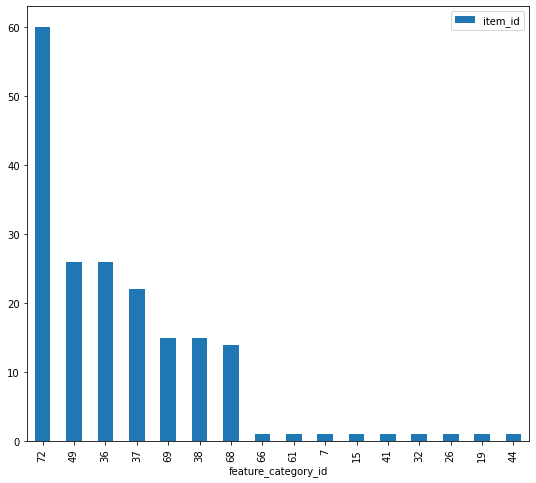

In [29]:
freq_2.plot(x='feature_category_id',y="item_id", kind="bar",figsize=(9,8))

In [30]:
#Repito el análisis anteior, en este caso con la categoría 72

b=len(freq_2)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)



for i in range(b):
    features_ranking.append([freq_2.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_2.iloc[i,0] in auxiliar_items_1[j][1]:
            if auxiliar_items_1[j][0] in items_sec:
                features_ranking[i][1].append(auxiliar_items_1[j][0])
                auxiliar_items_2.pop(j-f)
                f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)
    
print(features_ranking)

[[72, [76, 220, 240, 1109, 1969, 2280, 2451, 2498, 2513, 3335, 4732, 4736, 4770, 4997, 5025, 6402, 7198, 7728, 7772, 7932, 8576, 9014, 9311, 9975, 10459, 10688, 10905, 10961, 11195, 11436, 11512, 12121, 12338, 12646, 13537, 14180, 14320, 15358, 15496, 15711, 16191, 16557, 16790, 17021, 17054, 17304, 17451, 17728, 17818, 19435, 20338, 21684, 22348, 22469, 23117, 23970, 24955, 26550, 27011, 27612]], [49, [262, 2954, 3083, 3151, 3197, 3655, 5159, 7088, 8209, 8589, 8832, 8889, 10247, 12788, 13070, 14777, 15652, 16943, 18360, 18795, 19296, 19706, 22091, 25714, 25879, 26613]], [36, [15171, 20241, 20771, 24871]], [37, []], [69, [4304, 6979, 8842, 17569, 20114, 21008, 27505]], [38, []], [68, [3783, 5352, 7515, 14771, 19015, 19259, 24077]], [66, []], [61, []], [7, []], [15, []], [41, []], [32, []], [26, []], [19, []], [44, []]]


In [34]:
a=len(features_ranking)-1

items_3=[]

for i in range(a):
    b=len(features_ranking[i+1][1])
    for j in range(b):
        items_3.append(features_ranking[i+1][1][j])

items_3.sort()
print(items_3)

[262, 2954, 3083, 3151, 3197, 3655, 3783, 4304, 5159, 5352, 6979, 7088, 7515, 8209, 8589, 8832, 8842, 8889, 10247, 12788, 13070, 14771, 14777, 15171, 15652, 16943, 17569, 18360, 18795, 19015, 19259, 19296, 19706, 20114, 20241, 20771, 21008, 22091, 24077, 24871, 25714, 25879, 26613, 27505]


In [35]:
c=len(features)
f=0
auxiliar=pd.DataFrame()


for i in range(c):
    if features.iloc[i,0] in items_3:
        aux=pd.DataFrame(features.iloc[i:i+1],columns=['item_id','feature_category_id','feature_value_id'])
        auxiliar=auxiliar.append([aux],ignore_index=True)


In [36]:
freq_3 = auxiliar.groupby(['feature_category_id']).count() 
freq_3.sort_values(by="item_id",ascending=False, inplace=True)


freq_3.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

freq_3.drop(index=[0,1], inplace = True)  #saco las category 56 y 47


freq_3

,feature_category_id,item_id,feature_value_id
2,36,26,26
3,49,26,26
4,37,22,22
5,38,15,15
6,68,9,9
7,69,7,7
8,66,1,1


<AxesSubplot:xlabel='feature_category_id'>

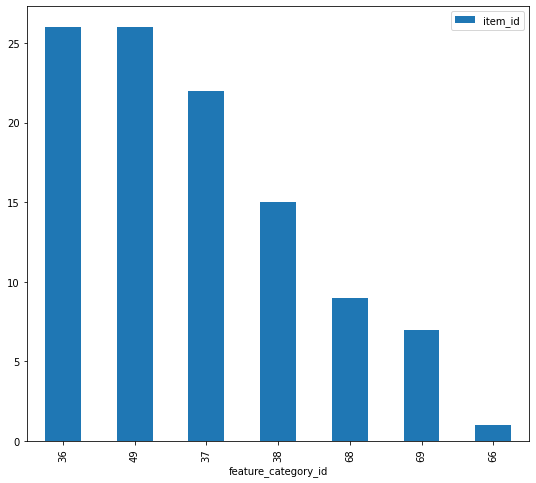

In [37]:
freq_3.plot(x='feature_category_id',y="item_id", kind="bar",figsize=(9,8))

Luego de la categoría 72, se tiene la categoría 36. Se repite el mismo análisis.

In [38]:
b=len(freq_3)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)



for i in range(b):
    features_ranking.append([freq_3.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_3.iloc[i,0] in auxiliar_items_1[j][1]:
            if auxiliar_items_1[j][0] in items_3:
                features_ranking[i][1].append(auxiliar_items_1[j][0])
                auxiliar_items_2.pop(j-f)
                f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)
    
print(features_ranking)

[[36, [262, 2954, 3083, 3151, 3197, 3655, 5159, 7088, 8209, 8589, 8832, 10247, 12788, 13070, 14777, 15171, 15652, 16943, 19296, 19706, 20241, 20771, 22091, 24871, 25879, 26613]], [49, [8889, 18360, 18795, 25714]], [37, []], [38, []], [68, [3783, 5352, 7515, 14771, 19015, 19259, 24077]], [69, [4304, 6979, 8842, 17569, 20114, 21008, 27505]], [66, []]]


In [39]:
a=len(features_ranking)-1

items_4=[]

for i in range(a):
    b=len(features_ranking[i+1][1])
    for j in range(b):
        items_4.append(features_ranking[i+1][1][j])

items_4.sort()
print(items_4)

[3783, 4304, 5352, 6979, 7515, 8842, 8889, 14771, 17569, 18360, 18795, 19015, 19259, 20114, 21008, 24077, 25714, 27505]


In [40]:
c=len(features)
f=0
auxiliar=pd.DataFrame()


for i in range(c):
    if features.iloc[i,0] in items_4:
        aux=pd.DataFrame(features.iloc[i:i+1],columns=['item_id','feature_category_id','feature_value_id'])
        auxiliar=auxiliar.append([aux],ignore_index=True)


In [41]:
freq_4 = auxiliar.groupby(['feature_category_id']).count() 
freq_4.sort_values(by="item_id",ascending=False, inplace=True)


freq_4.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

freq_4.drop(index=[0,1], inplace = True)  #saco las category 56 y 47


freq_4

,feature_category_id,item_id,feature_value_id
2,68,7,7
3,69,7,7
4,49,4,4
5,37,1,1
6,66,1,1


<AxesSubplot:xlabel='feature_category_id'>

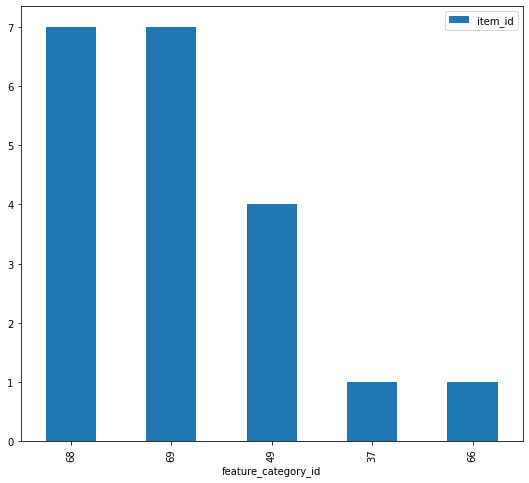

In [42]:
freq_4.plot(x='feature_category_id',y="item_id", kind="bar",figsize=(9,8))

In [43]:
b=len(freq_4)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)



for i in range(b):
    features_ranking.append([freq_4.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_4.iloc[i,0] in auxiliar_items_1[j][1]:
            if auxiliar_items_1[j][0] in items_4:
                features_ranking[i][1].append(auxiliar_items_1[j][0])
                auxiliar_items_2.pop(j-f)
                f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)
    
print(features_ranking)

[[68, [3783, 5352, 7515, 14771, 19015, 19259, 24077]], [69, [4304, 6979, 8842, 17569, 20114, 21008, 27505]], [49, [8889, 18360, 18795, 25714]], [37, []], [66, []]]


Finalmente los items restantes se reparten entre las categorías 68, 69 y 49.

Por lo tanto el primer nivel de categorías queda formado de la siguiente manera:

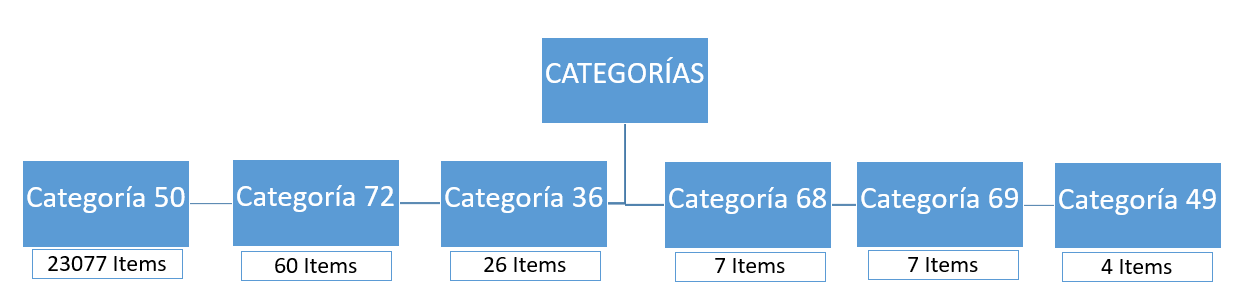

A continuación, se continua el análisis obteniendo las subcategorías dentro de la categoría 50.

Para ello solo se analizan los 23077 items de la categoría 50, y las categorías sin tener en cuenta las que ya forman parte del primer nivel (50, 72, 36, 68, 69 y 49)

In [44]:
b=len(freq_copy)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)




for i in range(b):
    features_ranking.append([freq_copy.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_copy.iloc[i,0] in auxiliar_items_1[j][1]:
            features_ranking[i][1].append(auxiliar_items_1[j][0])
            auxiliar_items_2.pop(j-f)
            f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)


In [45]:
items_50=features_ranking[0][1]
print(items_50)

[2, 3, 4, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 74, 78, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 137, 138, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 214, 215, 217, 218, 219, 221, 222, 223, 224, 225, 227, 228, 230, 231, 233, 234, 236, 238, 239, 241, 242, 243, 244, 245, 246, 247, 248, 251, 252, 253, 257, 258, 259, 260, 263, 264, 265, 266, 267, 269, 271, 273,

In [46]:
#Vuelvo a armar el dataframe de "features" solo con esos items_50


c=len(features)
f=0
auxiliar=pd.DataFrame()


for i in range(c):
    if features.iloc[i,0] in items_50:
        aux=pd.DataFrame(features.iloc[i:i+1],columns=['item_id','feature_category_id','feature_value_id'])
        auxiliar=auxiliar.append([aux],ignore_index=True)

auxiliar

,item_id,feature_category_id,feature_value_id
0,2,56,365
1,2,62,801
2,2,68,351
3,2,33,802
4,2,72,75
...,...,...,...
470331,28143,68,351
470332,28143,55,390
470333,28143,11,109
470334,28143,73,91


In [47]:
#Ordeno las categorías en base a la cantidad de items presentes en cada una

freq_5 = auxiliar.groupby(['feature_category_id']).count() 



freq_5.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
freq_5.sort_values(by="item_id",ascending=False, inplace=True)
freq_5.drop(index=[35,46,48,49,55,67,68,71], inplace = True)  #saco las category 56, 47, 50, 72, 36, 69, 68, 49


freq_5

,feature_category_id,item_id,feature_value_id
60,61,22511,22511
6,7,20415,20415
54,55,17779,17779
29,30,15412,15412
3,4,14954,14954
...,...,...,...
51,52,568,568
53,54,341,341
12,13,137,137
8,9,137,137


In [48]:
#Repito el proceso anterior, en este caso la categoría con mayor cantidad de items es la 61

b=len(freq_5)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)



for i in range(b):
    features_ranking.append([freq_5.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_5.iloc[i,0] in auxiliar_items_1[j][1]:
            if auxiliar_items_1[j][0] in items_50:
                features_ranking[i][1].append(auxiliar_items_1[j][0])
                auxiliar_items_2.pop(j-f)
                f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)
    
print(features_ranking)

[[61, [2, 3, 4, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 25, 26, 28, 29, 30, 32, 33, 35, 36, 38, 39, 40, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 67, 68, 69, 70, 74, 78, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 137, 138, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 214, 215, 217, 218, 219, 221, 222, 223, 224, 225, 227, 228, 230, 231, 233, 234, 236, 238, 241, 242, 243, 244, 245, 246, 247, 248, 251, 252, 253, 258, 259, 260, 263, 264, 265, 266, 267, 269, 271, 273, 274, 275, 277, 2

In [49]:
#Anlizo los items restantes para ver que otras categorías se tienen en el mismo nivel
#Se repiten los procesos antes vistos

a=len(features_ranking)-1

items_5=[]

for i in range(a):
    b=len(features_ranking[i+1][1])
    for j in range(b):
        items_5.append(features_ranking[i+1][1][j])

items_5.sort()

In [50]:
c=len(features)
f=0
auxiliar=pd.DataFrame()


for i in range(c):
    if features.iloc[i,0] in items_5:
        aux=pd.DataFrame(features.iloc[i:i+1],columns=['item_id','feature_category_id','feature_value_id'])
        auxiliar=auxiliar.append([aux],ignore_index=True)


In [51]:
freq_6 = auxiliar.groupby(['feature_category_id']).count() 
freq_6.sort_values(by="item_id",ascending=False, inplace=True)


freq_6.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

freq_6.drop(index=[0,1,2,3,5,6], inplace = True)  #saco las category 56 y 47.....


freq_6

,feature_category_id,item_id,feature_value_id
4,55,407,407
7,7,378,378
8,65,277,277
9,63,276,276
10,4,272,272
...,...,...,...
66,13,1,1
67,33,1,1
68,27,1,1
69,9,1,1


In [52]:
b=len(freq_6)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)



for i in range(b):
    features_ranking.append([freq_6.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_6.iloc[i,0] in auxiliar_items_1[j][1]:
            if auxiliar_items_1[j][0] in items_5:
                features_ranking[i][1].append(auxiliar_items_1[j][0])
                auxiliar_items_2.pop(j-f)
                f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)

In [53]:
a=len(features_ranking)-1

items_6=[]

for i in range(a):
    b=len(features_ranking[i+1][1])
    for j in range(b):
        items_6.append(features_ranking[i+1][1][j])

items_6.sort()
print(items_6)

[475, 928, 1528, 1617, 1919, 1982, 2043, 2094, 2370, 2930, 3495, 4432, 4826, 4901, 5321, 5348, 5351, 5453, 5528, 5657, 6746, 7923, 8479, 9021, 9263, 9385, 9952, 10107, 10141, 10151, 10537, 10668, 10784, 11112, 11406, 11504, 11533, 11812, 12235, 12699, 13873, 14005, 14993, 15190, 15269, 15401, 15898, 15912, 16024, 16030, 16166, 17189, 18050, 18763, 19211, 19754, 19849, 20081, 20440, 20746, 20854, 20916, 20950, 21230, 21256, 21541, 21912, 22067, 22430, 22773, 22880, 22962, 23489, 23493, 23604, 23633, 23901, 24421, 24571, 25409, 25659, 26276, 26774, 27128, 27148, 27213, 27280, 27429, 27529, 27685]


In [54]:
c=len(features)
f=0
auxiliar=pd.DataFrame()


for i in range(c):
    if features.iloc[i,0] in items_6:
        aux=pd.DataFrame(features.iloc[i:i+1],columns=['item_id','feature_category_id','feature_value_id'])
        auxiliar=auxiliar.append([aux],ignore_index=True)


In [55]:
freq_7 = auxiliar.groupby(['feature_category_id']).count() 
freq_7.sort_values(by="item_id",ascending=False, inplace=True)


freq_7.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

freq_7.drop(index=[0,1,2,3,4,5], inplace = True)  #saco las category 56 y 47.....


freq_7

,feature_category_id,item_id,feature_value_id
6,7,65,65
7,30,50,50
8,32,49,49
9,26,42,42
10,16,41,41
11,19,33,33
12,62,24,24
13,59,22,22
14,29,20,20
15,15,18,18


In [56]:
b=len(freq_7)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)



for i in range(b):
    features_ranking.append([freq_7.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_7.iloc[i,0] in auxiliar_items_1[j][1]:
            if auxiliar_items_1[j][0] in items_6:
                features_ranking[i][1].append(auxiliar_items_1[j][0])
                auxiliar_items_2.pop(j-f)
                f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)
    
print(features_ranking)

[[7, [475, 928, 1982, 2043, 2094, 2370, 2930, 3495, 4432, 4826, 4901, 5348, 5528, 7923, 8479, 9021, 10107, 10141, 10537, 10668, 11112, 11406, 11504, 11533, 11812, 12235, 12699, 13873, 14005, 14993, 15190, 15401, 15898, 15912, 16030, 16166, 18050, 18763, 19211, 19754, 19849, 20081, 20440, 20746, 20854, 20916, 20950, 21912, 22067, 22773, 22880, 22962, 23489, 23604, 24421, 24571, 25409, 25659, 26774, 27128, 27148, 27280, 27429, 27529, 27685]], [30, []], [32, [1528, 1617, 1919, 5453, 9263, 9952, 21541, 26276, 27213]], [26, []], [16, [23901]], [19, []], [62, []], [59, [21230]], [29, []], [15, []], [6, []], [60, []], [44, []], [41, []], [11, [5657]], [18, []], [65, []], [34, [10151, 15269, 16024]], [8, []], [25, []], [57, []], [67, [5321, 5351, 6746, 9385, 10784, 17189, 21256, 22430]], [31, []], [36, []], [37, []], [38, []], [49, []], [10, []], [71, []], [64, []], [5, []], [35, []], [2, []], [63, [23633]], [43, []], [14, []], [70, []], [52, []], [73, []], [53, []], [4, []], [48, []], [58, []

In [57]:
a=len(features_ranking)-1

items_7=[]

for i in range(a):
    b=len(features_ranking[i+1][1])
    for j in range(b):
        items_7.append(features_ranking[i+1][1][j])

items_7.sort()
print(items_7)

[1528, 1617, 1919, 5321, 5351, 5453, 5657, 6746, 9263, 9385, 9952, 10151, 10784, 15269, 16024, 17189, 21230, 21256, 21541, 22430, 23493, 23633, 23901, 26276, 27213]


In [58]:
c=len(features)
f=0
auxiliar=pd.DataFrame()


for i in range(c):
    if features.iloc[i,0] in items_7:
        aux=pd.DataFrame(features.iloc[i:i+1],columns=['item_id','feature_category_id','feature_value_id'])
        auxiliar=auxiliar.append([aux],ignore_index=True)

In [59]:
freq_8 = auxiliar.groupby(['feature_category_id']).count() 
freq_8.sort_values(by="item_id",ascending=False, inplace=True)


freq_8.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

freq_8.drop(index=[0,1,2,3,4,6], inplace = True)  #saco las category 56 y 47.....


freq_8

,feature_category_id,item_id,feature_value_id
5,32,9,9
7,67,8,8
8,37,7,7
9,31,7,7
10,38,7,7
11,36,7,7
12,49,6,6
13,64,6,6
14,71,6,6
15,2,4,4


In [60]:
b=len(freq_8)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)



for i in range(b):
    features_ranking.append([freq_8.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_8.iloc[i,0] in auxiliar_items_1[j][1]:
            if auxiliar_items_1[j][0] in items_7:
                features_ranking[i][1].append(auxiliar_items_1[j][0])
                auxiliar_items_2.pop(j-f)
                f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)
    
print(features_ranking)

[[32, [1528, 1617, 1919, 5453, 9263, 9952, 21541, 26276, 27213]], [67, [5321, 5351, 6746, 9385, 10784, 17189, 21256, 22430]], [37, []], [31, []], [38, []], [36, []], [49, []], [64, []], [71, []], [2, []], [34, [10151, 15269, 16024]], [63, [23633]], [59, [21230]], [42, []], [44, []], [4, []], [40, [23493]], [27, []], [26, []], [19, []], [16, [23901]], [15, []], [11, [5657]], [73, []]]


In [61]:
a=len(features_ranking)-1

items_8=[]

for i in range(a):
    b=len(features_ranking[i+1][1])
    for j in range(b):
        items_8.append(features_ranking[i+1][1][j])

items_8.sort()
print(items_8)

[5321, 5351, 5657, 6746, 9385, 10151, 10784, 15269, 16024, 17189, 21230, 21256, 22430, 23493, 23633, 23901]


In [62]:
c=len(features)
f=0
auxiliar=pd.DataFrame()


for i in range(c):
    if features.iloc[i,0] in items_8:
        aux=pd.DataFrame(features.iloc[i:i+1],columns=['item_id','feature_category_id','feature_value_id'])
        auxiliar=auxiliar.append([aux],ignore_index=True)

In [63]:
freq_9 = auxiliar.groupby(['feature_category_id']).count() 
freq_9.sort_values(by="item_id",ascending=False, inplace=True)


freq_9.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

freq_9.drop(index=[0,1,2,3,6], inplace = True)  #saco las category 56 y 47.....


freq_9

,feature_category_id,item_id,feature_value_id
4,67,8,8
5,31,7,7
7,37,7,7
8,38,7,7
9,49,6,6
10,71,6,6
11,64,6,6
12,2,4,4
13,34,3,3
14,72,3,3


In [64]:
b=len(freq_9)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)



for i in range(b):
    features_ranking.append([freq_9.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_9.iloc[i,0] in auxiliar_items_1[j][1]:
            if auxiliar_items_1[j][0] in items_8:
                features_ranking[i][1].append(auxiliar_items_1[j][0])
                auxiliar_items_2.pop(j-f)
                f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)
    
print(features_ranking)

[[67, [5321, 5351, 6746, 9385, 10784, 17189, 21256, 22430]], [31, []], [37, []], [38, []], [49, []], [71, []], [64, []], [2, []], [34, [10151, 15269, 16024]], [72, []], [4, [23633]], [42, []], [40, [23493]], [59, [21230]], [63, []], [27, []], [16, [23901]], [69, []], [11, [5657]], [73, []]]


In [65]:
a=len(features_ranking)-1

items_9=[]

for i in range(a):
    b=len(features_ranking[i+1][1])
    for j in range(b):
        items_9.append(features_ranking[i+1][1][j])

items_9.sort()
print(items_9)

[5657, 10151, 15269, 16024, 21230, 23493, 23633, 23901]


In [66]:
c=len(features)
f=0
auxiliar=pd.DataFrame()


for i in range(c):
    if features.iloc[i,0] in items_9:
        aux=pd.DataFrame(features.iloc[i:i+1],columns=['item_id','feature_category_id','feature_value_id'])
        auxiliar=auxiliar.append([aux],ignore_index=True)

In [67]:
freq_10 = auxiliar.groupby(['feature_category_id']).count() 
freq_10.sort_values(by="item_id",ascending=False, inplace=True)


freq_10.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')

freq_10.drop(index=[0,1,2,3,5], inplace = True)  #saco las category 56 y 47.....


freq_10

,feature_category_id,item_id,feature_value_id
4,34,3,3
6,4,1,1
7,11,1,1
8,16,1,1
9,40,1,1
10,59,1,1
11,63,1,1
12,69,1,1
13,73,1,1


In [68]:
b=len(freq_10)


features_ranking=[]

features_copy=features.copy()

auxiliar_items_1=items_features.copy()
auxiliar_items_2=items_features.copy()

c=len(auxiliar_items_1)



for i in range(b):
    features_ranking.append([freq_10.iloc[i,0],[]])
    f=0
    for j in range(c):
        if freq_10.iloc[i,0] in auxiliar_items_1[j][1]:
            if auxiliar_items_1[j][0] in items_9:
                features_ranking[i][1].append(auxiliar_items_1[j][0])
                auxiliar_items_2.pop(j-f)
                f=f+1
    
    auxiliar_items_1=auxiliar_items_2.copy()
    c=len(auxiliar_items_2)
    
print(features_ranking)

[[34, [10151, 15269, 16024]], [4, [23633]], [11, [5657]], [16, [23901]], [40, [23493]], [59, [21230]], [63, []], [69, []], [73, []]]


El resultado del análisis de las subcategorías dentro de la cateogría 50 es:

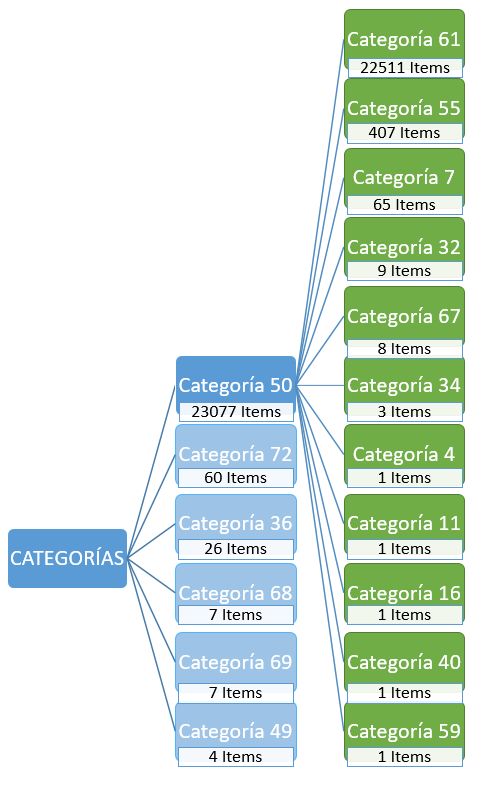

Si se continua el análisis de la misma manera para obtener las subcategorías dentro de la categoría 61 y así sucesivamente a lo largo de los distintos niveles de esa rama del Arbol de Categorías, parcialmente se obtienen los siguientes resultados:

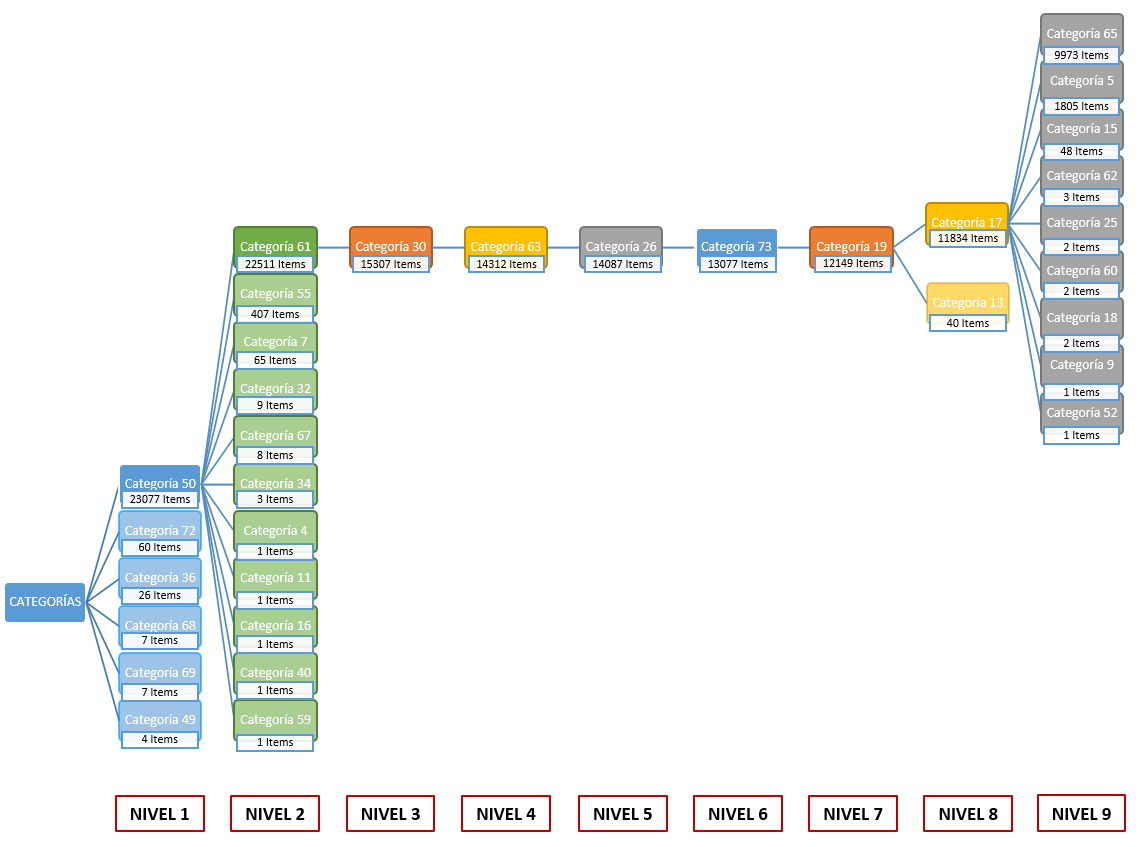

## CONCLUSIONES

Observando el gráfico anterior, si bien es un resultado parcial, se puede concluir que el intento de armar un Arbol de Categorías no resulto como se esperaba.

La distribución de items en las categorías de cada nivel es muy dispar, a su vez que se tienen varios niveles con una sola categoría dentro de una misma rama.

A priori, estas características no son las deseadas para un Arbol de Categorías y no resultan útiles como datos de entrada para entrenar un modelo.

Si bien se tiene un importante margen de mejora en la metodología para obtener el Arbol de Categorías y el código desarrollado para dicha tarea, por una cuestión de tiempos y volumenes de trabajo, se decidió no seguir adelante con esta alternativa.